In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
!rm -r /content/graphs

In [25]:
!mkdir graphs

In [26]:
files = ['/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/t5_train_val_test_res.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/retnet_train_val_res_v1.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/retnet_train_val_res_v2.json']

names=['DistilBERT', 'T5', 'RetNet v1', 'RetNet v2']

graphs_data = {}

for name, path in zip(names,files):
  with open(path) as f:
      d = json.load(f)
      graphs_data[name]=d

In [27]:
for k in graphs_data['DistilBERT'].keys():
  print(k)

training_loss_history
train_epochs_res
test_epochs_res
real_test_res


In [28]:
graphs_data['DistilBERT']['train_epochs_res']

[{'accuracy_ava': 0.7788184285163879,
  'loss': 0.7663203862998963,
  'accuracy_ovo': 0.9011094570159912,
  'conf_matrix': [[21776.0, 822.0, 898.0],
   [2202.0, 14386.0, 4168.0],
   [2772.0, 4110.0, 16557.0]]},
 {'accuracy_ava': 0.7890266180038452,
  'loss': 0.7568929154599822,
  'accuracy_ovo': 0.9127801060676575,
  'conf_matrix': [[20372.0, 825.0, 2299.0],
   [1403.0, 13578.0, 5775.0],
   [1377.0, 2602.0, 19460.0]]},
 {'accuracy_ava': 0.8105508685112,
  'loss': 0.736171012481879,
  'accuracy_ovo': 0.9248349070549011,
  'conf_matrix': [[21720.0, 568.0, 1208.0],
   [1576.0, 13662.0, 5518.0],
   [1736.0, 2218.0, 19485.0]]},
 {'accuracy_ava': 0.8131952285766602,
  'loss': 0.7328689499699559,
  'accuracy_ovo': 0.9252633452415466,
  'conf_matrix': [[20818.0, 1339.0, 1339.0],
   [1105.0, 17339.0, 2312.0],
   [1276.0, 5274.0, 16889.0]]},
 {'accuracy_ava': 0.820611298084259,
  'loss': 0.7266834555143014,
  'accuracy_ovo': 0.9310100078582764,
  'conf_matrix': [[21822.0, 491.0, 1183.0],
   [142

In [29]:
def plot_metric(res_info, sample_cd, sample_nm, metric_cd, metric_nm, save_path):
  df_plot=pd.DataFrame(columns=names)
  for mod in names:
    model_data = [v[metric_cd] for v in res_info[mod][sample_cd]]
    df_plot.loc[:, mod]=model_data

  df_plot.plot(figsize=(12,5))
  ax = plt.gca()
  ax.set_xlabel('Epochs')
  ax.set_title(f'{sample_nm}: {metric_nm}')
  ax.grid(True, alpha=0.4)
  plt.savefig(f'{save_path}', bbox_inches='tight')

# Accuracy all-vs-all on train sample

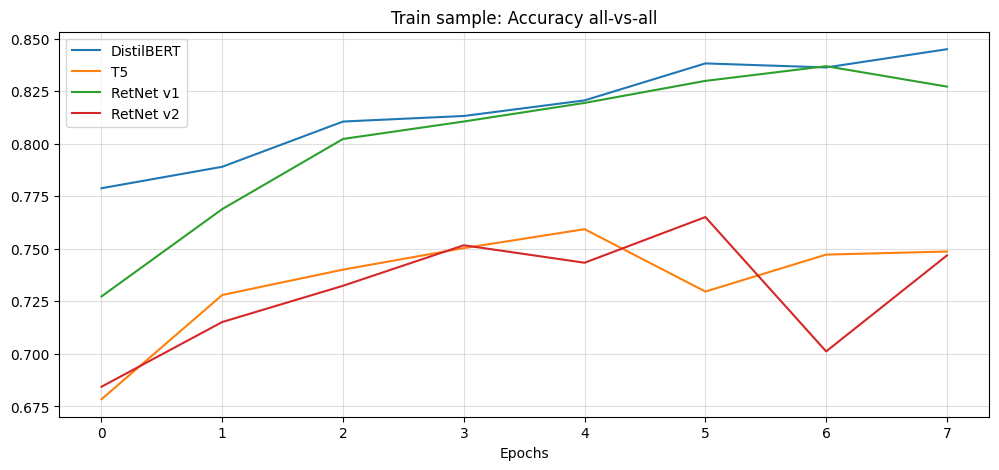

In [30]:
plot_metric(graphs_data, 'train_epochs_res', 'Train sample', 'accuracy_ava', 'Accuracy all-vs-all','/content/graphs/model_selection0.png')

# Accuracy one-vs-rest on train sample

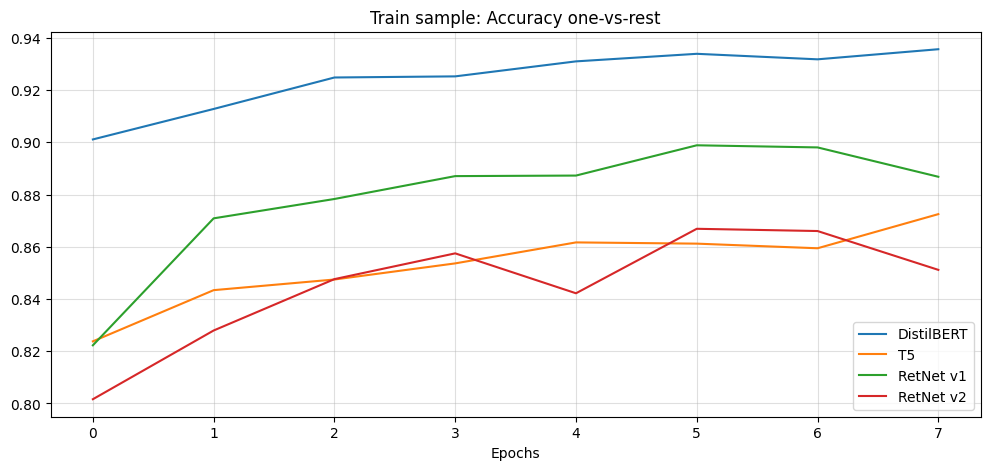

In [31]:
plot_metric(graphs_data, 'train_epochs_res', 'Train sample', 'accuracy_ovo', 'Accuracy one-vs-rest','/content/graphs/model_selection1.png')

# Accuracy all-vs-all on validation sample

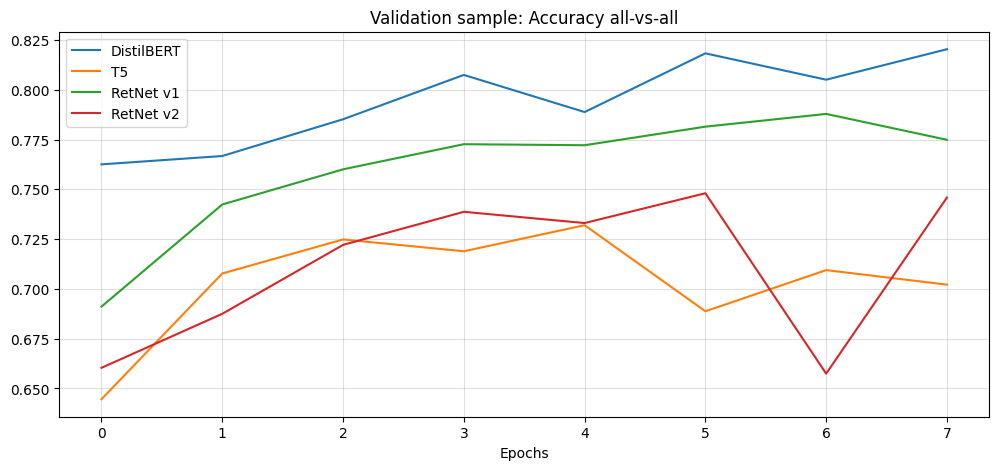

In [32]:
plot_metric(graphs_data, 'test_epochs_res', 'Validation sample', 'accuracy_ava', 'Accuracy all-vs-all','/content/graphs/model_selection2.png')

# Accuracy one-vs-rest on validation sample

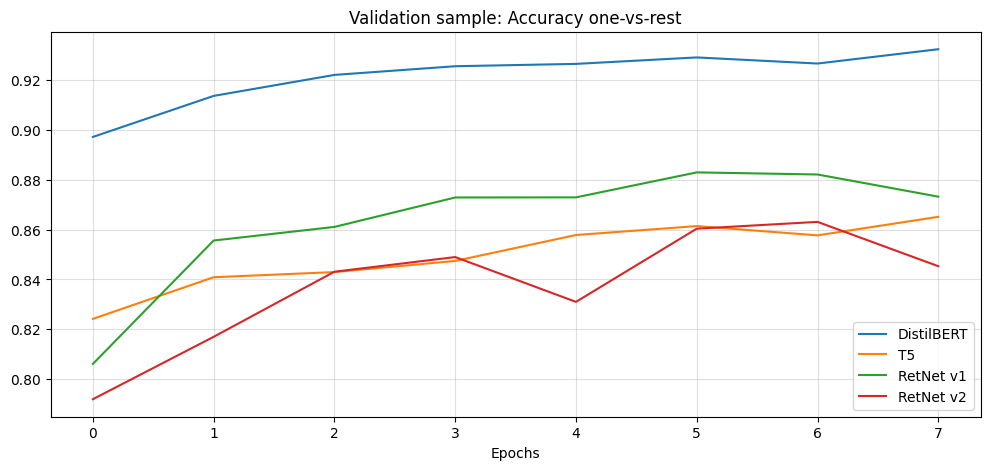

In [33]:
plot_metric(graphs_data, 'test_epochs_res', 'Validation sample', 'accuracy_ovo', 'Accuracy one-vs-rest','/content/graphs/model_selection3.png')

# Loss (cross-entropy) on train sample

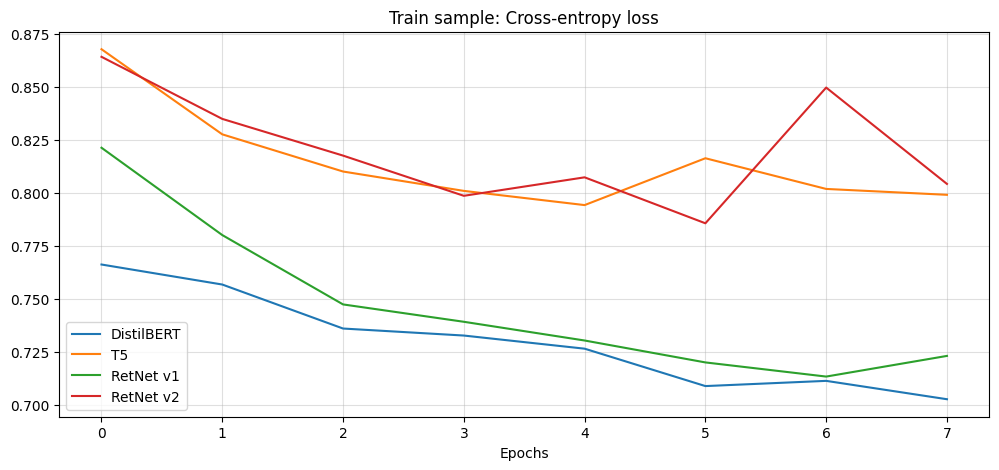

In [34]:
plot_metric(graphs_data, 'train_epochs_res', 'Train sample', 'loss', 'Cross-entropy loss','/content/graphs/model_selection4.png')

# Loss (cross-entropy) on validation sample

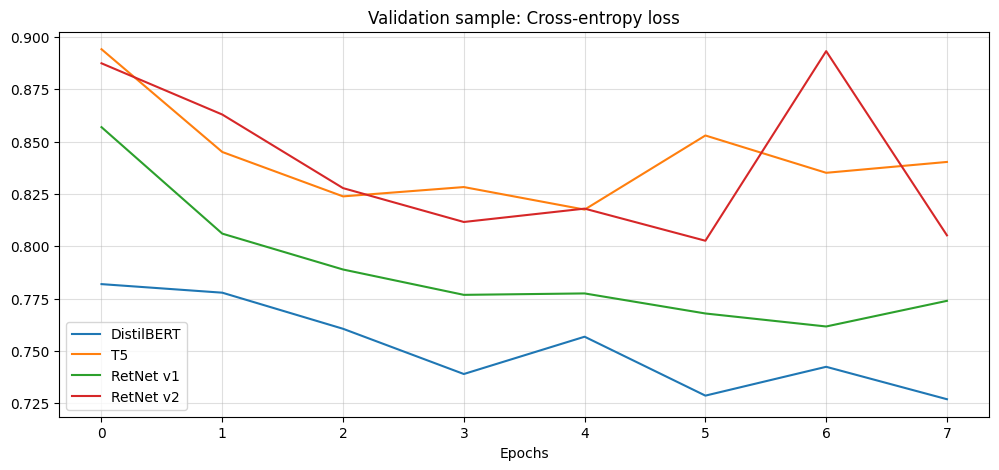

In [35]:
plot_metric(graphs_data, 'test_epochs_res', 'Validation sample', 'loss', 'Cross-entropy loss','/content/graphs/model_selection5.png')

In [36]:
#confusion matrices on test dataset


for k, v in graphs_data.items():
  print(k)
  print(v['real_test_res'])


DistilBERT
[{'accuracy_ava': 0.8231670260429382, 'loss': -1, 'accuracy_ovo': 0.9331742525100708, 'conf_matrix': [[5202.0, 137.0, 343.0], [414.0, 4836.0, 1411.0], [310.0, 571.0, 4793.0]]}]
T5
[{'accuracy_ava': 0.7112727165222168, 'loss': -1, 'accuracy_ovo': 0.863795280456543, 'conf_matrix': [[4911.0, 186.0, 585.0], [912.0, 3342.0, 2407.0], [771.0, 341.0, 4562.0]]}]
RetNet v1
[{'accuracy_ava': 0.7850363254547119, 'loss': -1, 'accuracy_ovo': 0.8780596256256104, 'conf_matrix': [[5085.0, 401.0, 196.0], [843.0, 4768.0, 1050.0], [757.0, 626.0, 4291.0]]}]
RetNet v2
[{'accuracy_ava': 0.7419659495353699, 'loss': -1, 'accuracy_ovo': 0.8459787964820862, 'conf_matrix': [[5385.0, 289.0, 8.0], [1211.0, 5026.0, 424.0], [1267.0, 1450.0, 2957.0]]}]


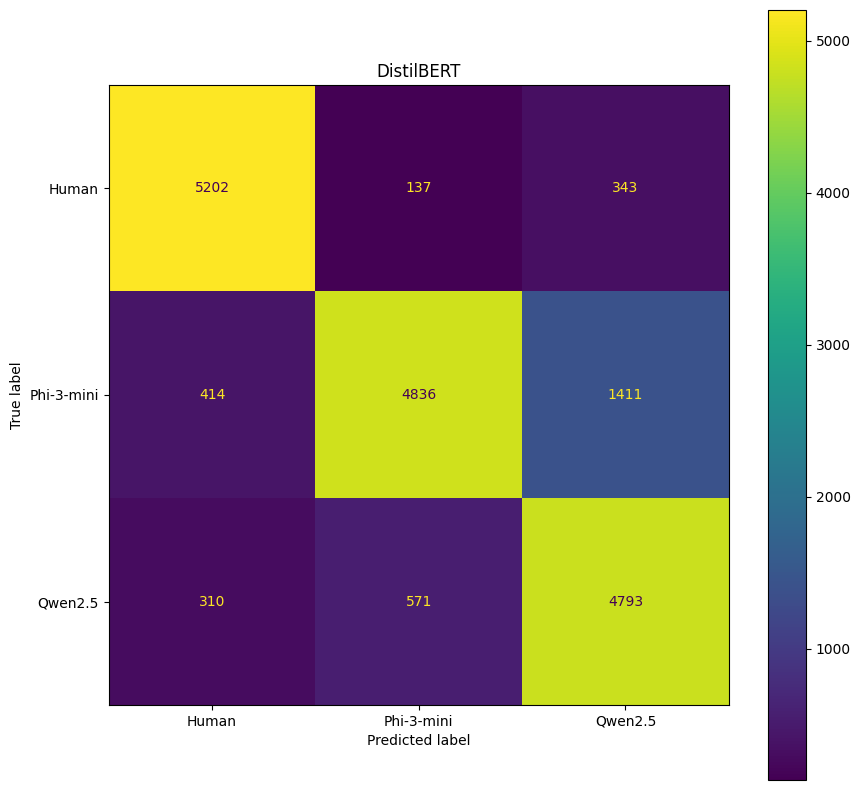

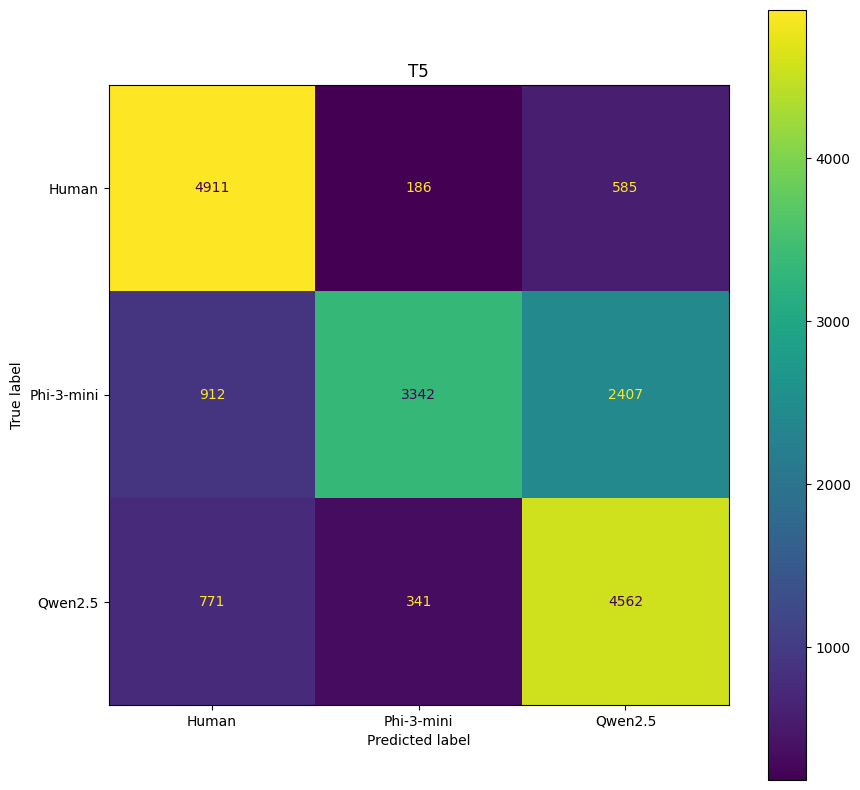

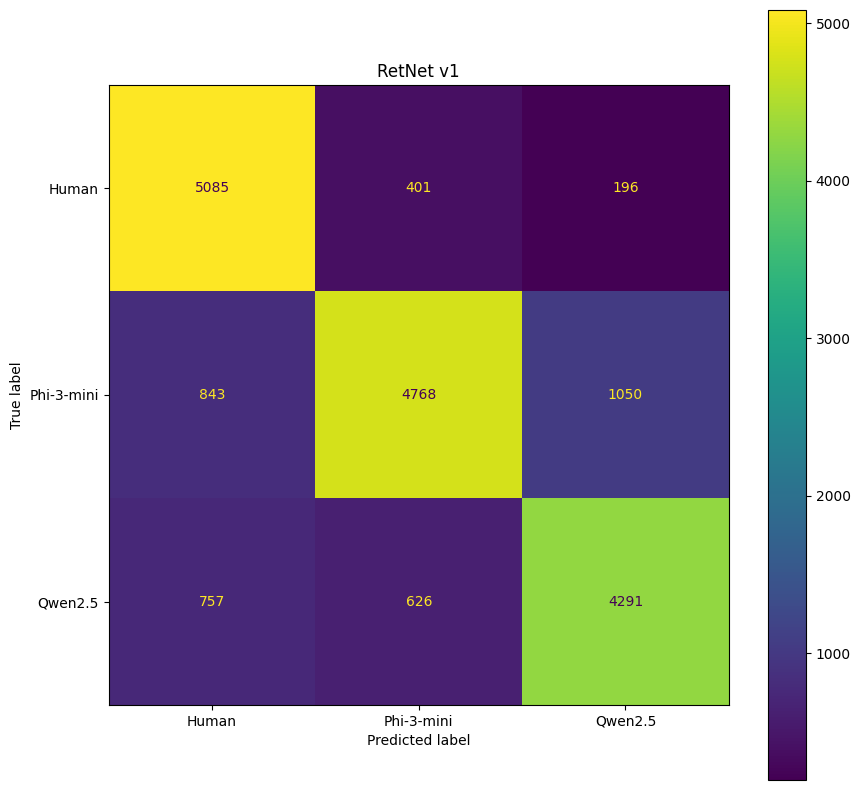

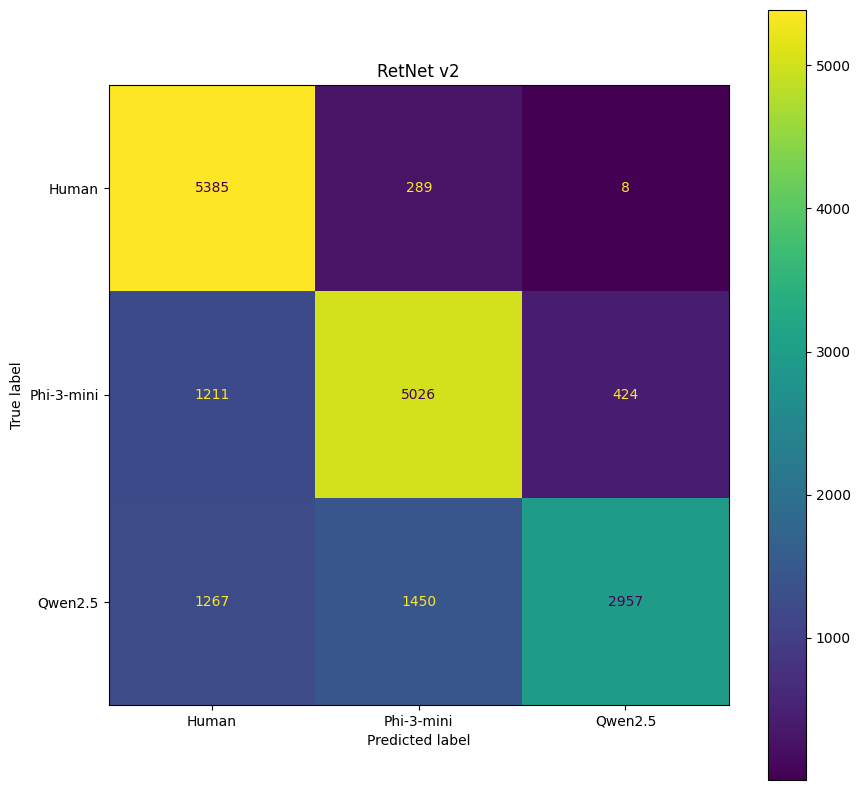

In [37]:
i=0
for k, v in graphs_data.items():
  fig, ax = plt.subplots(figsize=(10, 10))
  ConfusionMatrixDisplay(np.array(v['real_test_res'][0]['conf_matrix']), display_labels=['Human', 'Phi-3-mini', 'Qwen2.5']).plot(ax=ax, values_format='n')
  ax.set_title(k)
  plt.savefig(f'/content/graphs/model_selection_confmat{i}_{"_".join(k.split(" "))}.png', bbox_inches='tight')
  plt.show()

  i+=1

In [38]:
def precision_macro(conf_matrix):
  #macro = averaged across precisions for each class
  n_classes = conf_matrix.shape[0]
  by_class = []
  for i in range(n_classes):
    val = conf_matrix[i, i]/conf_matrix[:, i].sum()
    by_class.append(val)
  return by_class, sum(by_class)/n_classes # class-wise precision and macro

def recall_macro(conf_matrix):
  #macro = averaged across recalls for each class
  n_classes = conf_matrix.shape[0]
  by_class = []
  for i in range(n_classes):
    val = conf_matrix[i, i]/conf_matrix[i, :].sum()
    by_class.append(val)
  return by_class, sum(by_class)/n_classes # class-wise recall and macro

def precision_ovo(conf_matrix, one_label=0): #one_label -- the label of the class which is opposed to other ones
  sub_matrix = conf_matrix[:, one_label]
  denum = conf_matrix.sum() - sub_matrix.sum()
  num = conf_matrix.sum() - sub_matrix.sum() - conf_matrix[one_label, :].sum() + conf_matrix[one_label, one_label]
  return num/denum
def recall_ovo(conf_matrix, one_label=0):
  return conf_matrix[one_label, one_label]/conf_matrix[one_label, :].sum()


In [39]:
df_results = pd.DataFrame(columns=['Model',
                                   'Accuracy (AvA)',
                                   'Precision macro',
                                   'Recall macro',
                                   'Accuracy (OvR)',
                                   'Precision (OvR)',
                                   'Recall (OvR)'
                                   ])
i=0

for k, v in graphs_data.items():
  m = np.array(v['real_test_res'][0]['conf_matrix'])
  df_results.loc[i, :]=[
      k,
      v['real_test_res'][0]['accuracy_ava'],
      precision_macro(m)[1],
      recall_macro(m)[1],
      v['real_test_res'][0]['accuracy_ovo'],
      precision_ovo(m),
      recall_ovo(m)
  ]
  i+=1
df_results

,Model,Accuracy (AvA),Precision macro,Recall macro,Accuracy (OvR),Precision (OvR),Recall (OvR)
0,DistilBERT,0.823167,0.827404,0.828757,0.933174,0.960301,0.915523
1,T5,0.711273,0.737492,0.723351,0.863795,0.932505,0.864308
2,RetNet v1,0.785036,0.786135,0.788999,0.87806,0.947317,0.894931
3,RetNet v2,0.741966,0.766774,0.74114,0.845979,0.97075,0.94773


In [40]:
print(df_results.to_latex(float_format=lambda x: f'{x:.3f}'))

\begin{tabular}{llllllll}
\toprule
 & Model & Accuracy (AvA) & Precision macro & Recall macro & Accuracy (OvR) & Precision (OvR) & Recall (OvR) \\
\midrule
0 & DistilBERT & 0.823 & 0.827 & 0.829 & 0.933 & 0.960 & 0.916 \\
1 & T5 & 0.711 & 0.737 & 0.723 & 0.864 & 0.933 & 0.864 \\
2 & RetNet v1 & 0.785 & 0.786 & 0.789 & 0.878 & 0.947 & 0.895 \\
3 & RetNet v2 & 0.742 & 0.767 & 0.741 & 0.846 & 0.971 & 0.948 \\
\bottomrule
\end{tabular}



In [41]:
#for tables
for k, v in graphs_data.items():
  m = np.array(v['real_test_res'][0]['conf_matrix'])
  print(f"""{k} test sample results:\n precision macro {precision_macro(m)[1]:.3f}\n recall macro {recall_macro(m)[1]:.3f}
        precision class-wise: {', '.join([str(round(x, 3))for x in precision_macro(m)[0]])}
        recall class-wise: {', '.join([str(round(x, 3))for x in recall_macro(m)[0]])}
 precision OvR and recall OvR where O=Human: {precision_ovo(m):.3f} and {recall_ovo(m):.3f}

 accuracy AvA: {v['real_test_res'][0]['accuracy_ava']:.3f}
 accuracy OvR: {v['real_test_res'][0]['accuracy_ovo']:.3f}
-------------------------------------------------------------------------------
        """)

DistilBERT test sample results:
 precision macro 0.827
 recall macro 0.829
        precision class-wise: 0.878, 0.872, 0.732
        recall class-wise: 0.916, 0.726, 0.845
 precision OvR and recall OvR where O=Human: 0.960 and 0.916

 accuracy AvA: 0.823
 accuracy OvR: 0.933
-------------------------------------------------------------------------------
        
T5 test sample results:
 precision macro 0.737
 recall macro 0.723
        precision class-wise: 0.745, 0.864, 0.604
        recall class-wise: 0.864, 0.502, 0.804
 precision OvR and recall OvR where O=Human: 0.933 and 0.864

 accuracy AvA: 0.711
 accuracy OvR: 0.864
-------------------------------------------------------------------------------
        
RetNet v1 test sample results:
 precision macro 0.786
 recall macro 0.789
        precision class-wise: 0.761, 0.823, 0.775
        recall class-wise: 0.895, 0.716, 0.756
 precision OvR and recall OvR where O=Human: 0.947 and 0.895

 accuracy AvA: 0.785
 accuracy OvR: 0.878
---

# Result: The model based on DistilBert with the addition of attention where question and answer are combined is superior in metrics

# Below the tuning for the architecture is present

In [51]:
files = ['/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v2.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v3.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v4.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v6.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v5.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v9.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v8.json',
         '/content/drive/MyDrive/Colab Notebooks/NLP proj/distilbert_train_val_res_v10.json']

names=['Base','+1 attention head', '+2 attention heads','no dropout', '+0.1 to dropout', 'GELU before FC', 'ELU(1) before FC', '+2 att. heads and GELU', '+2 att. heads and GELU w/out question']

graphs_data = {}

for name, path in zip(names,files):
  with open(path) as f:
      d = json.load(f)
      graphs_data[name]=d

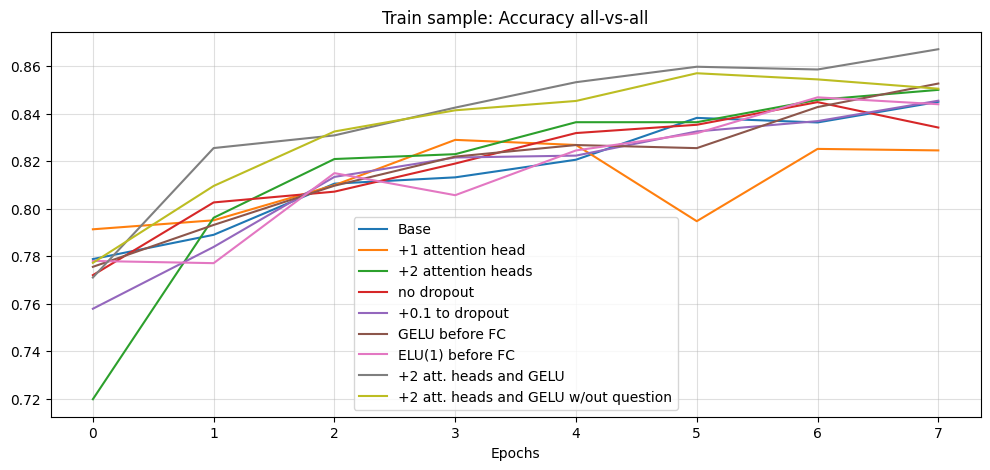

In [52]:
plot_metric(graphs_data, 'train_epochs_res', 'Train sample', 'accuracy_ava', 'Accuracy all-vs-all','/content/graphs/finetuning0.png')

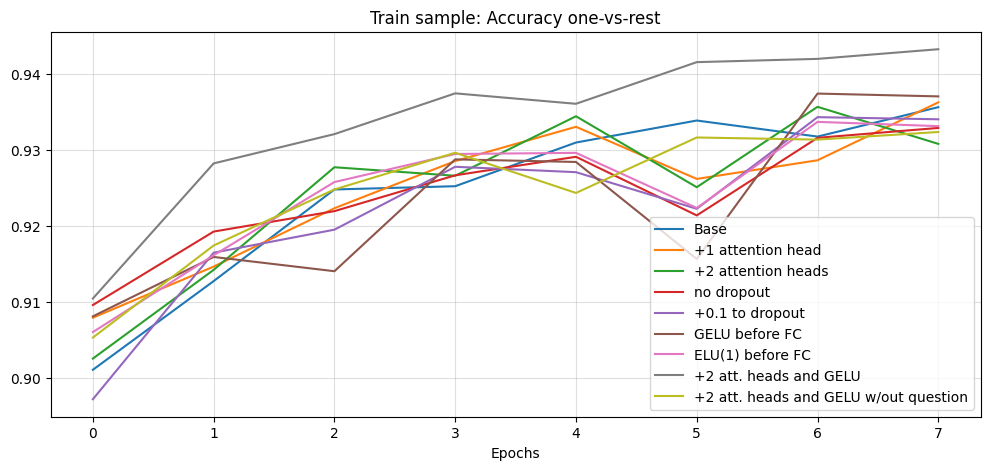

In [53]:
plot_metric(graphs_data, 'train_epochs_res', 'Train sample', 'accuracy_ovo', 'Accuracy one-vs-rest','/content/graphs/finetuning1.png')

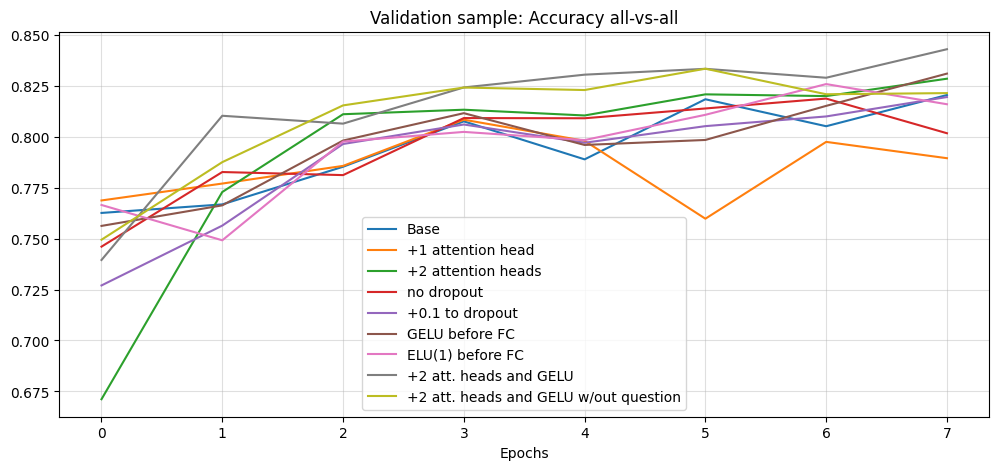

In [54]:
plot_metric(graphs_data, 'test_epochs_res', 'Validation sample', 'accuracy_ava', 'Accuracy all-vs-all','/content/graphs/finetuning2.png')

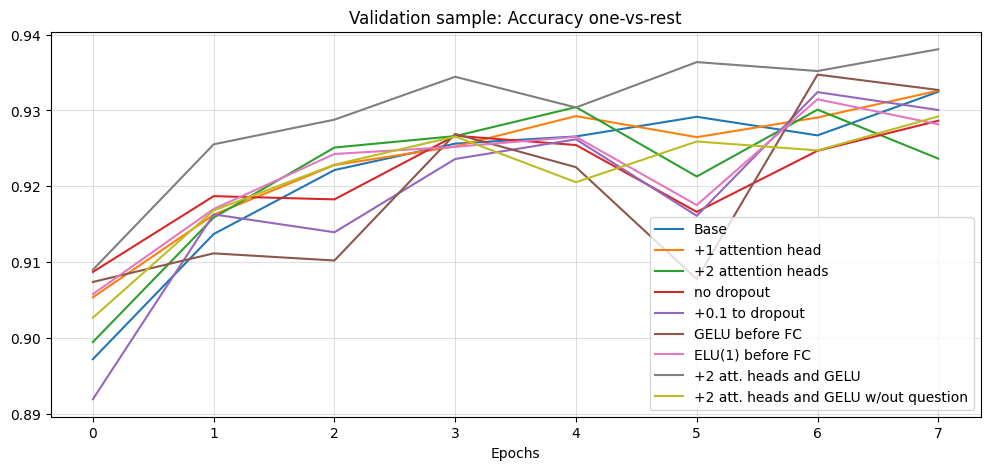

In [55]:
plot_metric(graphs_data, 'test_epochs_res', 'Validation sample', 'accuracy_ovo', 'Accuracy one-vs-rest','/content/graphs/finetuning3.png')

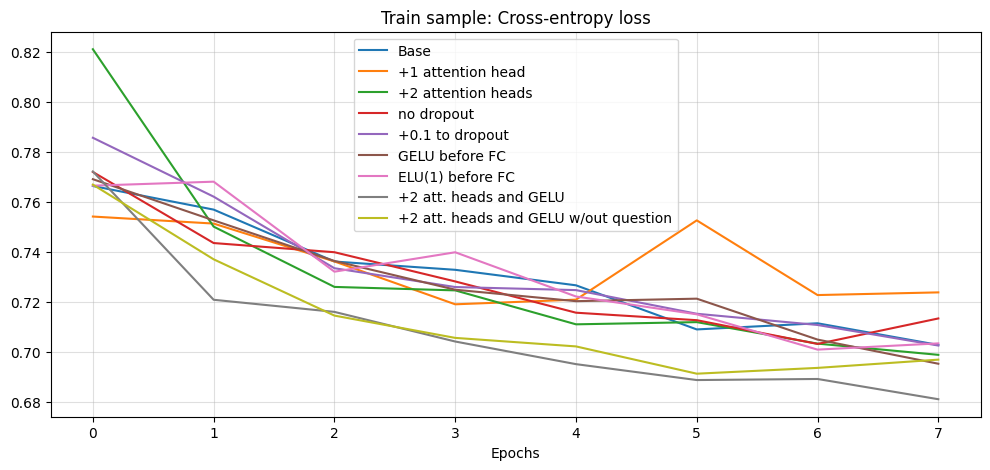

In [56]:
plot_metric(graphs_data, 'train_epochs_res', 'Train sample', 'loss', 'Cross-entropy loss','/content/graphs/finetuning4.png')

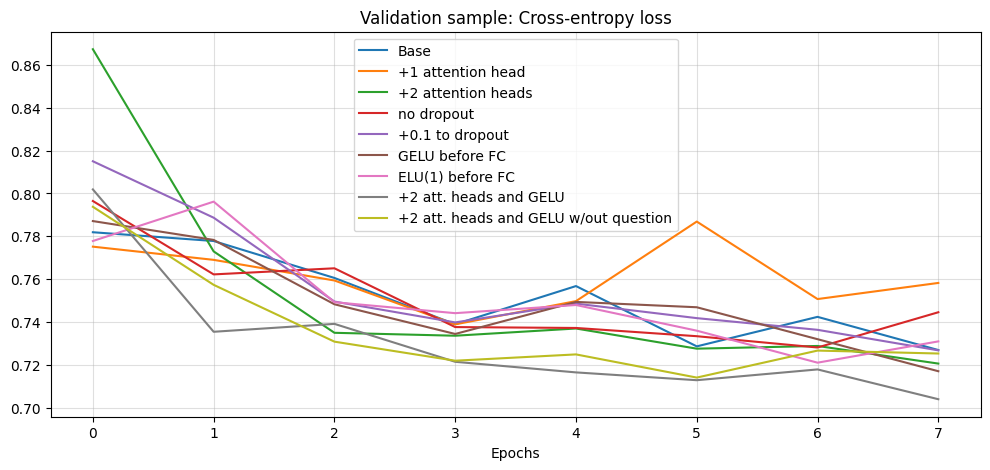

In [57]:
plot_metric(graphs_data, 'test_epochs_res', 'Validation sample', 'loss', 'Cross-entropy loss','/content/graphs/finetuning5.png')

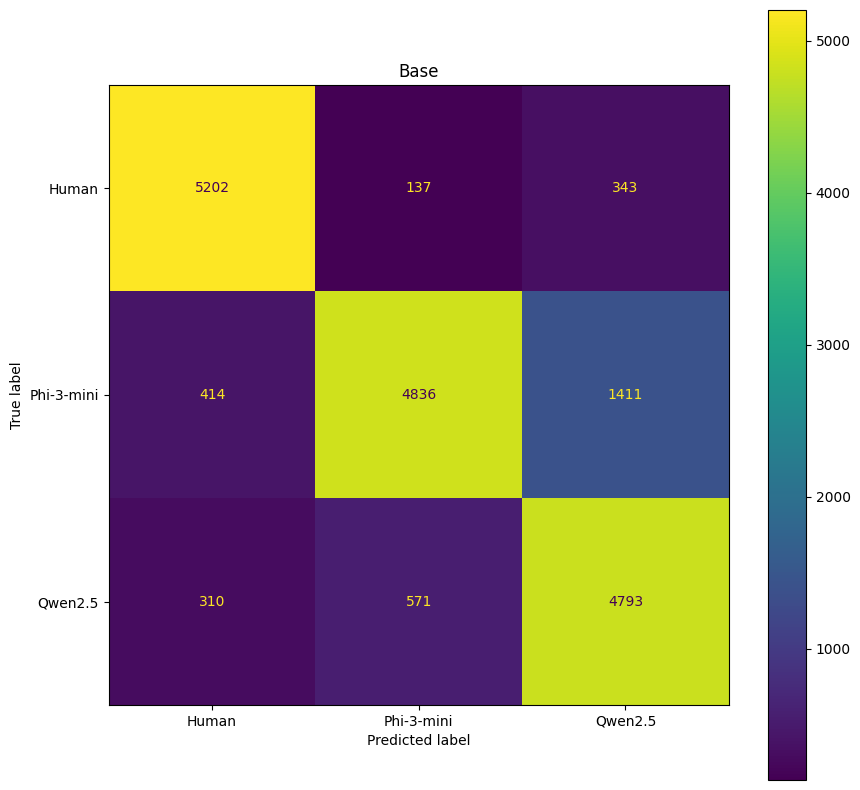

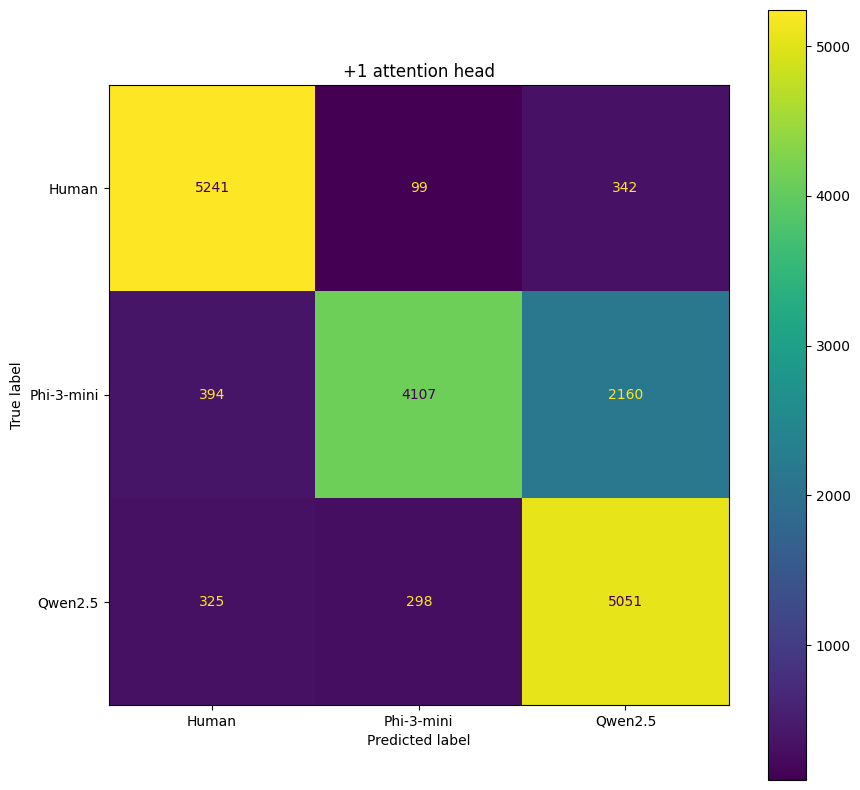

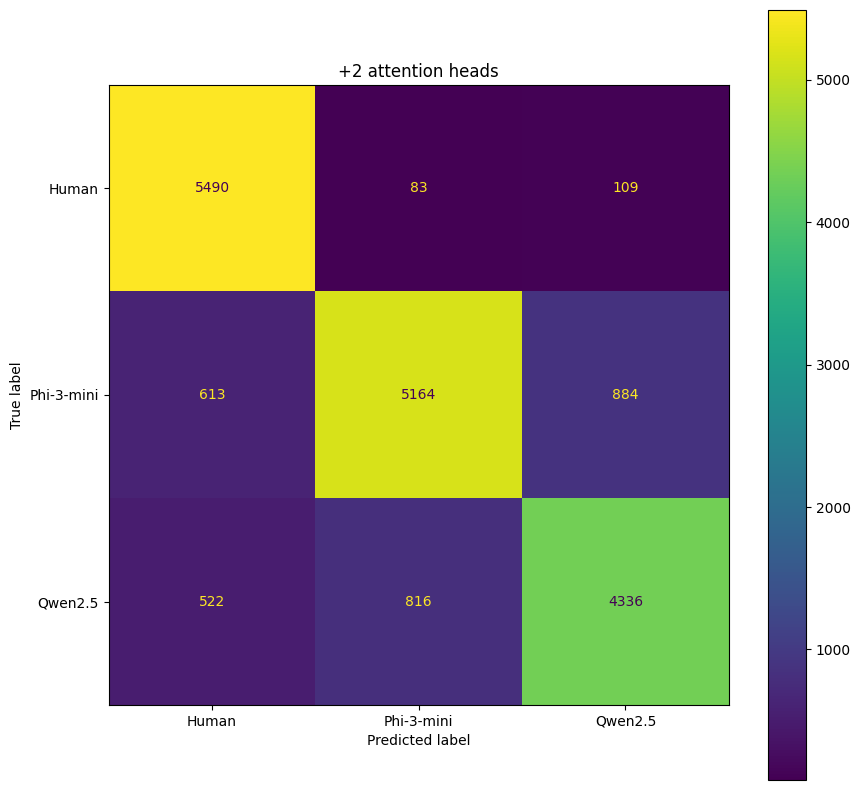

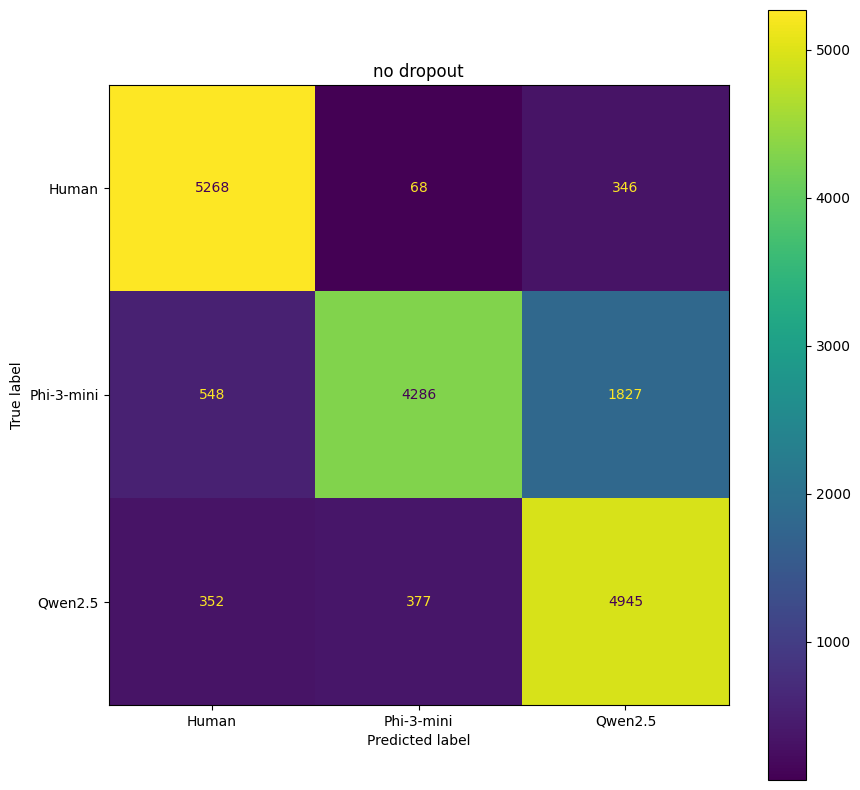

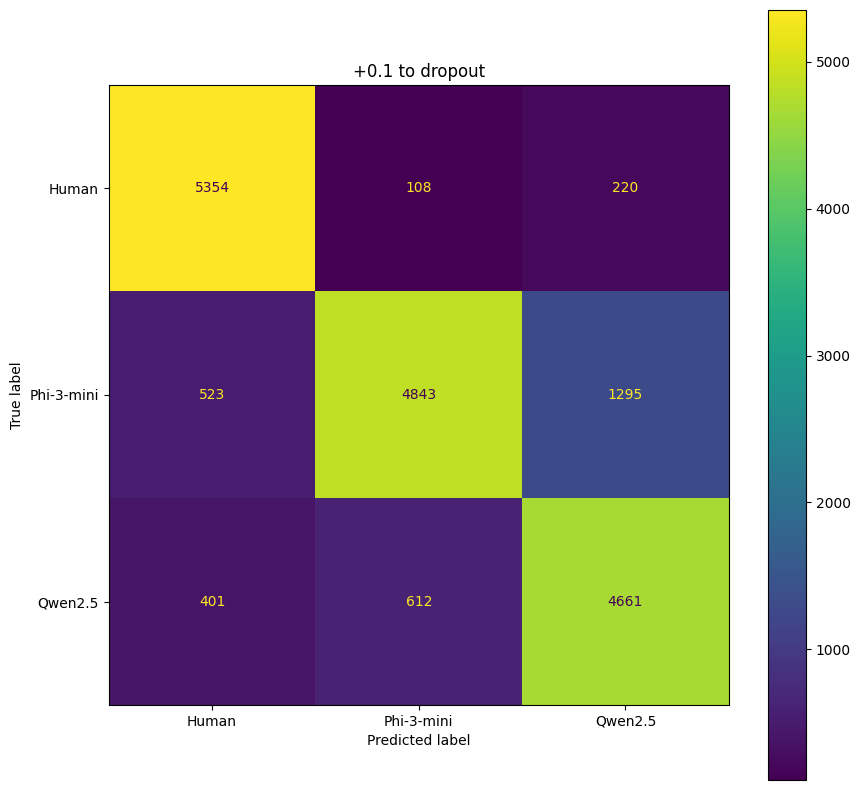

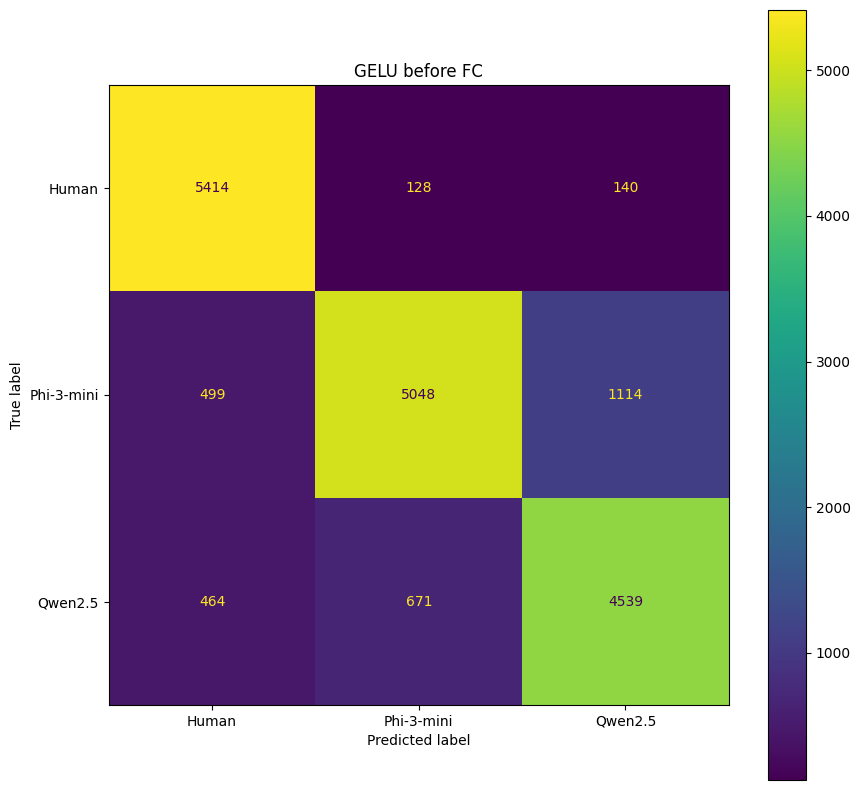

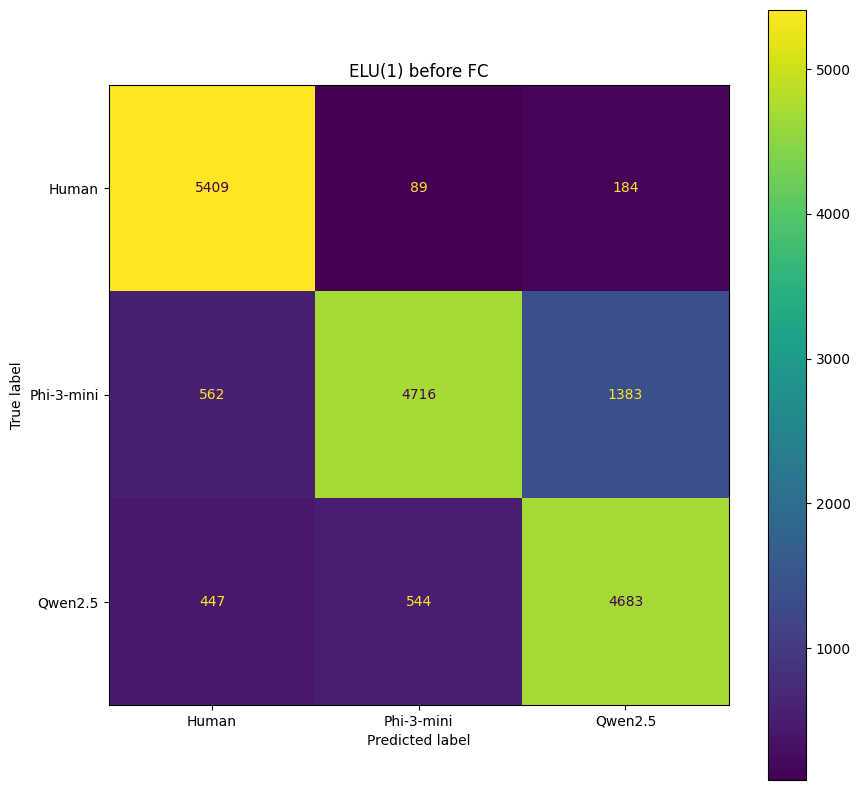

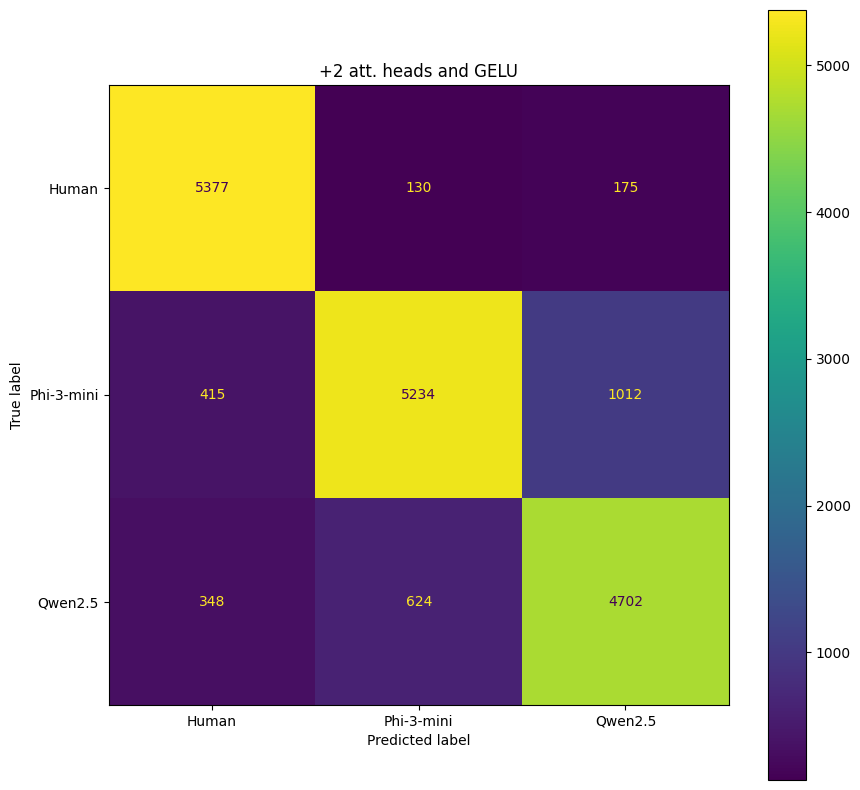

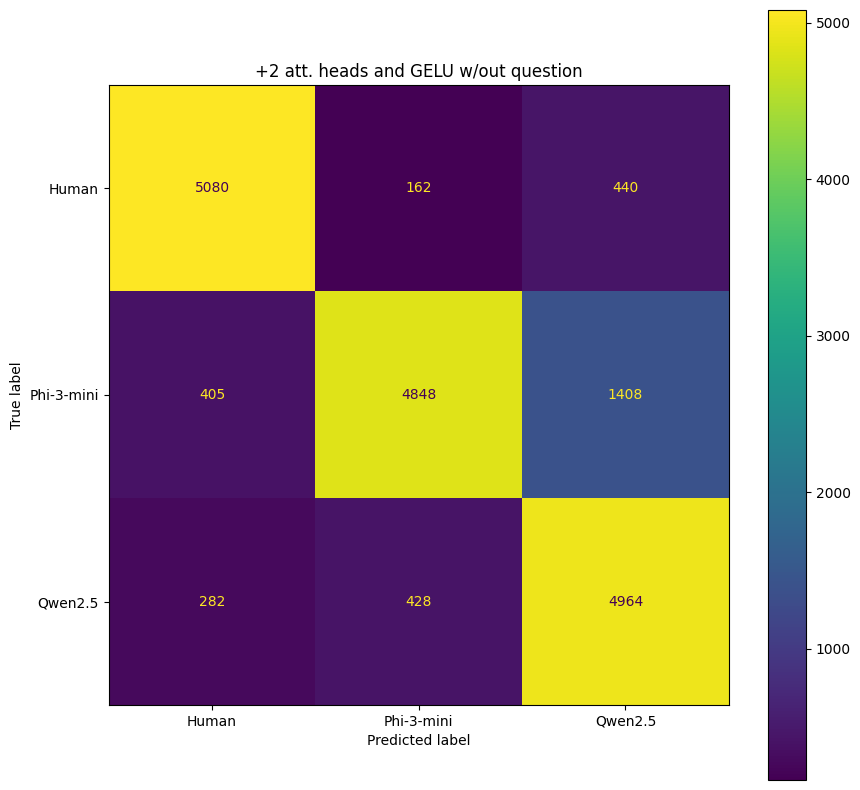

In [60]:
i=0
for k, v in graphs_data.items():
  fig, ax = plt.subplots(figsize=(10, 10))
  ConfusionMatrixDisplay(np.array(v['real_test_res'][0]['conf_matrix']), display_labels=['Human', 'Phi-3-mini', 'Qwen2.5']).plot(ax=ax, values_format='n')
  ax.set_title(k)
  plt.savefig(f'/content/graphs/finetuning_confmat{i}_{"_".join(k.replace("/", "").split(" "))}.png', bbox_inches='tight')
  plt.show()
  i+=1

In [61]:
df_results = pd.DataFrame(columns=['Model',
                                   'Accuracy (AvA)',
                                   'Precision macro',
                                   'Recall macro',
                                   'Accuracy (OvR)',
                                   'Precision (OvR)',
                                   'Recall (OvR)'
                                   ])
i=0

for k, v in graphs_data.items():
  m = np.array(v['real_test_res'][0]['conf_matrix'])
  df_results.loc[i, :]=[
      k,
      v['real_test_res'][0]['accuracy_ava'],
      precision_macro(m)[1],
      recall_macro(m)[1],
      v['real_test_res'][0]['accuracy_ovo'],
      precision_ovo(m),
      recall_ovo(m)
  ]
  i+=1
df_results

,Model,Accuracy (AvA),Precision macro,Recall macro,Accuracy (OvR),Precision (OvR),Recall (OvR)
0,Base,0.823167,0.827404,0.828757,0.933174,0.960301,0.915523
1,+1 attention head,0.79919,0.819986,0.80972,0.935616,0.963424,0.922386
2,+2 attention heads,0.831992,0.831355,0.835219,0.926347,0.983146,0.966209
3,no dropout,0.80474,0.818248,0.814035,0.927069,0.96506,0.927138
4,+0.1 to dropout,0.824666,0.826029,0.830269,0.93051,0.972059,0.942274
5,GELU before FC,0.832603,0.831956,0.836881,0.931676,0.976976,0.952834
6,ELU(1) before FC,0.82189,0.824575,0.828433,0.928845,0.976463,0.951954
7,+2 att. heads and GELU,0.849919,0.849417,0.853594,0.940723,0.97432,0.946322
8,+2 att. heads and GELU w/out question,0.826553,0.833697,0.832246,0.928456,0.950857,0.894051


In [62]:
print(df_results.to_latex(float_format=lambda x: f'{x:.3f}'))

\begin{tabular}{llllllll}
\toprule
 & Model & Accuracy (AvA) & Precision macro & Recall macro & Accuracy (OvR) & Precision (OvR) & Recall (OvR) \\
\midrule
0 & Base & 0.823 & 0.827 & 0.829 & 0.933 & 0.960 & 0.916 \\
1 & +1 attention head & 0.799 & 0.820 & 0.810 & 0.936 & 0.963 & 0.922 \\
2 & +2 attention heads & 0.832 & 0.831 & 0.835 & 0.926 & 0.983 & 0.966 \\
3 & no dropout & 0.805 & 0.818 & 0.814 & 0.927 & 0.965 & 0.927 \\
4 & +0.1 to dropout & 0.825 & 0.826 & 0.830 & 0.931 & 0.972 & 0.942 \\
5 & GELU before FC & 0.833 & 0.832 & 0.837 & 0.932 & 0.977 & 0.953 \\
6 & ELU(1) before FC & 0.822 & 0.825 & 0.828 & 0.929 & 0.976 & 0.952 \\
7 & +2 att. heads and GELU & 0.850 & 0.849 & 0.854 & 0.941 & 0.974 & 0.946 \\
8 & +2 att. heads and GELU w/out question & 0.827 & 0.834 & 0.832 & 0.928 & 0.951 & 0.894 \\
\bottomrule
\end{tabular}



In [63]:
#for tables
for k, v in graphs_data.items():
  m = np.array(v['real_test_res'][0]['conf_matrix'])
  print(f"""{k} test sample results:\n precision macro {precision_macro(m)[1]:.3f}\n recall macro {recall_macro(m)[1]:.3f}
        precision class-wise: {', '.join([str(round(x, 3))for x in precision_macro(m)[0]])}
        recall class-wise: {', '.join([str(round(x, 3))for x in recall_macro(m)[0]])}
 precision OvR and recall OvR where O=Human: {precision_ovo(m):.3f} and {recall_ovo(m):.3f}

 accuracy AvA: {v['real_test_res'][0]['accuracy_ava']:.3f}
 accuracy OvR: {v['real_test_res'][0]['accuracy_ovo']:.3f}
-------------------------------------------------------------------------------
        """)

Base test sample results:
 precision macro 0.827
 recall macro 0.829
        precision class-wise: 0.878, 0.872, 0.732
        recall class-wise: 0.916, 0.726, 0.845
 precision OvR and recall OvR where O=Human: 0.960 and 0.916

 accuracy AvA: 0.823
 accuracy OvR: 0.933
-------------------------------------------------------------------------------
        
+1 attention head test sample results:
 precision macro 0.820
 recall macro 0.810
        precision class-wise: 0.879, 0.912, 0.669
        recall class-wise: 0.922, 0.617, 0.89
 precision OvR and recall OvR where O=Human: 0.963 and 0.922

 accuracy AvA: 0.799
 accuracy OvR: 0.936
-------------------------------------------------------------------------------
        
+2 attention heads test sample results:
 precision macro 0.831
 recall macro 0.835
        precision class-wise: 0.829, 0.852, 0.814
        recall class-wise: 0.966, 0.775, 0.764
 precision OvR and recall OvR where O=Human: 0.983 and 0.966

 accuracy AvA: 0.832
 accura

# As for addition of more heads, it does not help much in general except for OvR classification as metrics show

In [64]:
!zip -r /content/graphs.zip /content/graphs

  adding: content/graphs/ (stored 0%)
  adding: content/graphs/model_selection5.png (deflated 5%)
  adding: content/graphs/model_selection1.png (deflated 7%)
  adding: content/graphs/finetuning_confmat7_+2_att._heads_and_GELU.png (deflated 20%)
  adding: content/graphs/model_selection_confmat3_RetNet_v2.png (deflated 21%)
  adding: content/graphs/finetuning2.png (deflated 6%)
  adding: content/graphs/finetuning4.png (deflated 6%)
  adding: content/graphs/finetuning_confmat8_+2_att._heads_and_GELU_wout_question.png (deflated 18%)
  adding: content/graphs/model_selection_confmat2_RetNet_v1.png (deflated 21%)
  adding: content/graphs/model_selection0.png (deflated 6%)
  adding: content/graphs/finetuning_confmat2_+2_attention_heads.png (deflated 19%)
  adding: content/graphs/model_selection2.png (deflated 5%)
  adding: content/graphs/finetuning0.png (deflated 5%)
  adding: content/graphs/finetuning1.png (deflated 4%)
  adding: content/graphs/finetuning5.png (deflated 6%)
  adding: content/